# CSE385 - Data Mining
## Final Project 

#### by:

## Muhammad Tamer
### 17P6044
## .

In [1]:
# importimg the libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the training and test data
rawtrain = pd.read_csv("C:/Users/LENOVO/Desktop\ML\Kaggle/titanic/train.csv")
rawtest = pd.read_csv("C:/Users/LENOVO/Desktop\ML\Kaggle/titanic/test.csv")
rawtrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## exploring the data

In [3]:
rawtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#try to find the correlation between sex of the passenger and survival
pd.crosstab(rawtrain.Sex, rawtrain.Survived, margins = True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [5]:
#same as the above command but this time showing percentages (out of all passengers)
pd.crosstab(rawtrain.Sex, rawtrain.Survived, margins = True, normalize = True)

Survived,0,1,All
Sex,,,
female,0.090909,0.261504,0.352413
male,0.525253,0.122334,0.647587
All,0.616162,0.383838,1.000000


<AxesSubplot:title={'center':'Data Correlation'}>

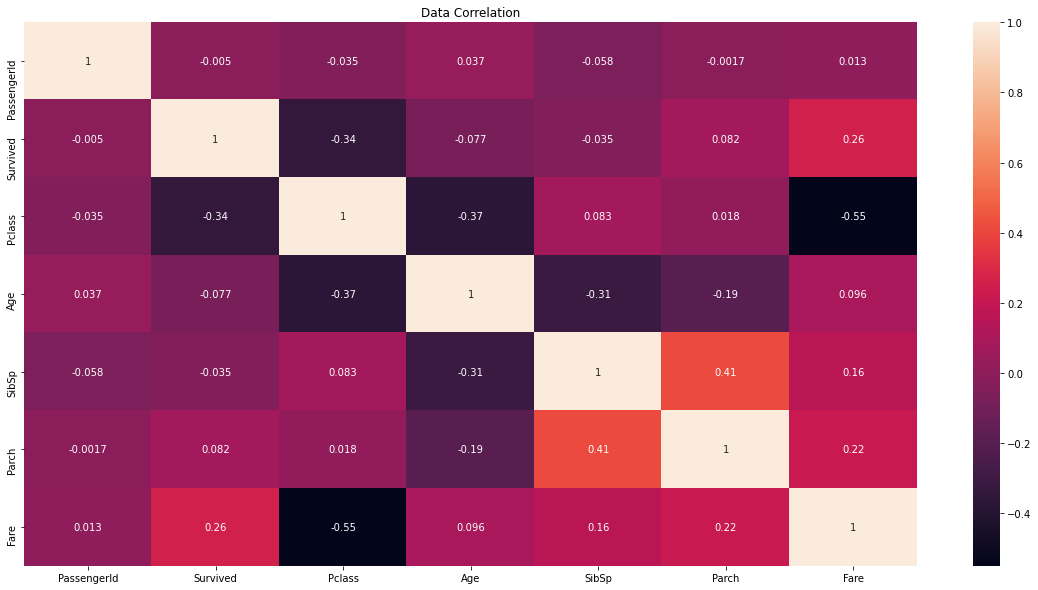

In [6]:
# plotting the correlation between all the features of the dataset
# this step will help us eliminate or even generate a new feature (e.g. using PCA) to reduce 
#the dimensionality of our problem

plt.subplots(figsize = (20,10))
plt.title("Data Correlation")
sns.heatmap(rawtrain.corr(), annot = True)

In [7]:
# for i in rawtrain.columns:
#     print(i)
#     print(rawtrain[i].unique())

In [8]:
#printing all the unique values of each feature
for i in rawtrain:
    # this condition is to avoid printing a value like age or passengerID
    # these features will have a huge number of unique values and we do not need to find them
    if len(list(rawtrain[i].unique())) < 10: 
        print(i, list(rawtrain[i].unique()))

Survived [0, 1]
Pclass [3, 1, 2]
Sex ['male', 'female']
SibSp [1, 0, 3, 4, 2, 5, 8]
Parch [0, 1, 2, 5, 3, 4, 6]
Embarked ['S', 'C', 'Q', nan]


In [9]:
#printing a summary of all the data
rawtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## cleaning our data

In [10]:
#replacing some ordinal values with numerical values in order to be able to distinguish between them better
rawtrain.replace('male', 1, inplace = True)
rawtrain.replace('female', 0, inplace = True)

#for example in the case of class the difference between classes affects the outcome 
#so it would be better to give them numerical values that give more value to one class over the other
rawtrain.replace('S', 0, inplace = True)
rawtrain.replace('C', 1, inplace = True)
rawtrain.replace('Q', 2, inplace = True)
rawtrain.replace('nan', 3, inplace = True)

#checking our changes
for i in rawtrain:
    if len(list(rawtrain[i].unique())) < 10:
        print(i, list(rawtrain[i].unique()))

Survived [0, 1]
Pclass [3, 1, 2]
Sex [1, 0]
SibSp [1, 0, 3, 4, 2, 5, 8]
Parch [0, 1, 2, 5, 3, 4, 6]
Embarked [0.0, 1.0, 2.0, nan]


In [11]:
# we drop some features which will not have effect on the  survival rate of the passenger 
# we also drop the passengerID since it is not needed either to detect survival or find a certain passsenger
nrm_rawtrain = rawtrain.drop( ['PassengerId', 'Name', 'Ticket'], axis = 1)
nrm_rawtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,0.0
1,1,1,0,38.0,1,0,71.2833,C85,1.0
2,1,3,0,26.0,0,0,7.9250,NaN,0.0
3,1,1,0,35.0,1,0,53.1000,C123,0.0
4,0,3,1,35.0,0,0,8.0500,NaN,0.0


In [12]:
#here we replace all cabin numbers with numerical values, since the first letter of the cabin number indicates the
#location of the cabin so we do not care abiut the specific cabin number

#here we could have also used pd.get_dummies to avoid giving numbers to categorical values as the 
#method currently used could favor some classes with higher number replacements even if this was not true

nrm_rawtrain['Cabin'].replace(to_replace=r'^A.*$', value=1, regex=True, inplace=True)
nrm_rawtrain['Cabin'].replace(to_replace=r'^B.*$', value=2, regex=True, inplace=True)
nrm_rawtrain['Cabin'].replace(to_replace=r'^C.*$', value=3, regex=True, inplace=True)
nrm_rawtrain['Cabin'].replace(to_replace=r'^D.*$', value=4, regex=True, inplace=True)
nrm_rawtrain['Cabin'].replace(to_replace=r'^E.*$', value=5, regex=True, inplace=True)
nrm_rawtrain['Cabin'].replace(to_replace=r'^F.*$', value=6, regex=True, inplace=True)
nrm_rawtrain['Cabin'].replace(to_replace=r'^G.*$', value=7, regex=True, inplace=True)
nrm_rawtrain['Cabin'].replace(to_replace=r'^T.*$', value=8, regex=True, inplace=True)

In [13]:
#finding the columns with highest missing data
print('Train columns with null values:\n', nrm_rawtrain.isnull().sum())
print("-"*10,'\n')

print(nrm_rawtrain.describe(include = 'all'))

Train columns with null values:
 Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64
---------- 

         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  714.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.647587   29.699118    0.523008    0.381594   
std      0.486592    0.836071    0.477990   14.526497    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   20.125000    0.000000    0.000000   
50%      0.000000    3.000000    1.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   38.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare       Cabin    Embarked  
count  891.000000  204.

In [14]:
#since we have found cabin to have a huge percentage with nan value we must drop this column
nrm_rawtrain = nrm_rawtrain.drop( ['Cabin'], axis = 1)
nrm_rawtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0


In [15]:
#as for the empty values of Age we can replace them with the mean since this will not affect the distribution
#we can also try to replace them with the median since they are close

print('Before :: \n', nrm_rawtrain['Age'].describe())

nrm_rawtrain['Age'].fillna(nrm_rawtrain['Age'].mean(), inplace = True)

print('\nnumber of empty age fields :: ', nrm_rawtrain['Age'].isnull().sum())
print('\nAfter :: \n',nrm_rawtrain['Age'].describe())
#we can see that the statistics do not change

Before :: 
 count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

number of empty age fields ::  0

After :: 
 count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64


In [16]:
nrm_rawtrain['Fare'].fillna(nrm_rawtrain['Fare'].mean(), inplace = True)

In [17]:
#since there are only 2 empty values in Embarked we can replace them with the mode
#this is categorical data so we can not replace them with mean or median, mode will have the least effect

nrm_rawtrain['Embarked'].fillna(nrm_rawtrain['Embarked'].mode()[0], inplace = True)
print('number of empty embarked fields :: ', nrm_rawtrain['Age'].isnull().sum())

number of empty embarked fields ::  0


In [18]:
for i in nrm_rawtrain.columns:
#     print(i)
    if len(list(rawtrain[i].unique())) < 10:
        print(i, nrm_rawtrain[i].unique())

Survived [0 1]
Pclass [3 1 2]
Sex [1 0]
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked [0. 1. 2.]


In [19]:
nrm_rawtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [20]:
#normalize the age and fare around the mean in new normalized age and normalized fare columns
#this will save our model some computational power

nrm_rawtrain['nrmAge'] = StandardScaler().fit_transform(nrm_rawtrain['Age'].values.reshape(-1, 1))
nrm_rawtrain['nrmFare'] = StandardScaler().fit_transform(nrm_rawtrain['Fare'].values.reshape(-1, 1))
nrm_rawtrain.drop(['Age', 'Fare'], axis=1, inplace=True)
nrm_rawtrain.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,nrmAge,nrmFare
0,0,3,1,1,0,0.0,-0.592481,-0.502445
1,1,1,0,1,0,1.0,0.638789,0.786845
2,1,3,0,0,0,0.0,-0.284663,-0.488854
3,1,1,0,1,0,0.0,0.407926,0.420730
4,0,3,1,0,0,0.0,0.407926,-0.486337


In [21]:
print('Train columns with null values:\n', nrm_rawtrain.isnull().sum())

Train columns with null values:
 Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
nrmAge      0
nrmFare     0
dtype: int64


C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

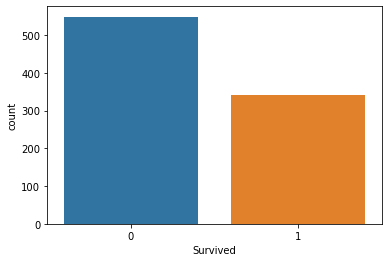

In [22]:
#now we compare the number of survival in our training dataset
sns.countplot('Survived', data = nrm_rawtrain)

In [23]:
#here we divide our dataset into survived and not
#this step is necessary so our model will get balanced data and our data will not be skewed
#in other scenarios such as a CNN we could use data augmentation but it is not necessary here

livesample = np.array(nrm_rawtrain[nrm_rawtrain.Survived == 1].index)
deadsample = np.array(nrm_rawtrain[nrm_rawtrain.Survived != 1].index)
# deadsample.shape

In [24]:
livenum = len(livesample)
deadnum = len(deadsample)
print(livenum, deadnum)

342 549


In [25]:
#we get a number of dead samples (the bigger set) to equal the living passengers
rand_dead = np.random.choice(deadsample, livenum)
len(rand_dead)

342

In [26]:
#we concatenate our equally matched data sampled to get a balanced training dataset
balanced_indx = np.concatenate([rand_dead, livesample])

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

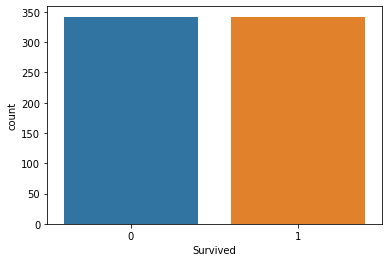

In [27]:
#we plot the data to check
balancedt = nrm_rawtrain.iloc[balanced_indx, :]
sns.countplot('Survived', data = balancedt)

In [28]:
balancedt.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,nrmAge,nrmFare
102,0,1,1,0,1,0.0,-0.669435,0.907738
528,0,3,1,0,0,0.0,0.715743,-0.488854
749,0,3,1,0,0,2.0,0.100109,-0.492378
397,0,2,1,0,0,0.0,1.254424,-0.124920
624,0,3,1,0,0,0.0,-0.669435,-0.324253


In [29]:
#shuffle the data bcs in our last step we concatenated all the dead followed by all the living
balancedt = balancedt.sample(frac=1).reset_index(drop=True)
balancedt.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,nrmAge,nrmFare
0,0,3,0,0,2,0.0,0.869652,-0.241449
1,1,3,0,0,0,0.0,-0.592481,-0.492378
2,0,2,1,1,0,0.0,0.946606,-0.104785
3,1,3,0,0,0,2.0,-0.823344,-0.489776
4,1,3,1,0,0,0.0,0.023154,-0.457142


<AxesSubplot:title={'center':'Data Correlation'}>

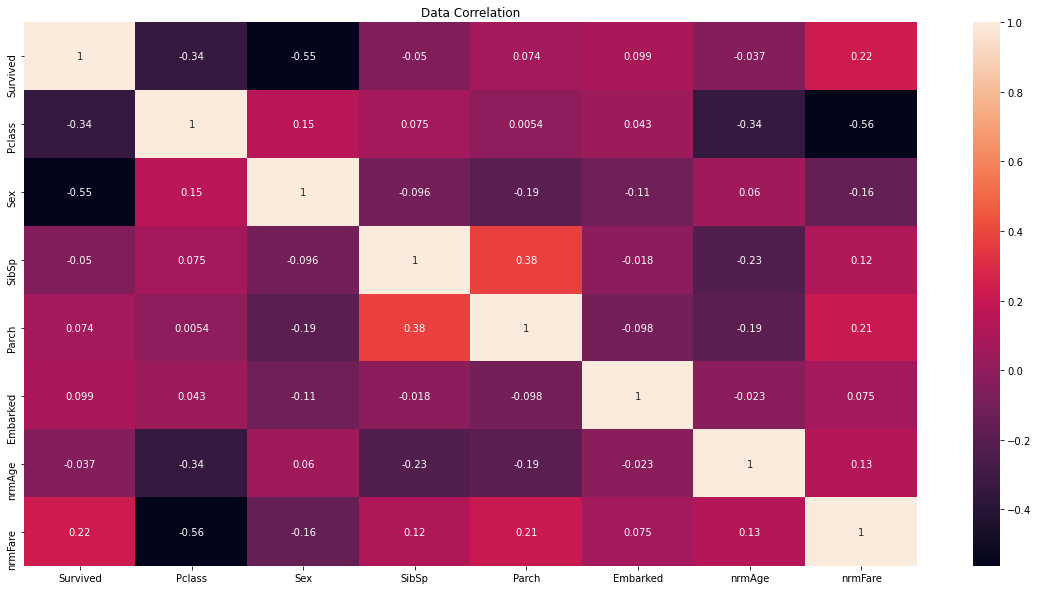

In [30]:
# once more we check for correlation between our features, if there is a high correlation between any 2 features
# even if it is a negative correlation, then we can combine them in 1 feature

# however here we do not find any positive or negative correlation that is high enough
plt.subplots(figsize = (20,10))
plt.title("Data Correlation")
sns.heatmap(balancedt.corr(), annot = True)

## cleaning our test data

#### this step is really important so that our model will have a better accuracy
#### by ignoring unimportant features and cleaning the data 

In [31]:
rawtest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
rawtest.replace('male', 1, inplace = True)
rawtest.replace('female', 0, inplace = True)
rawtest.replace('S', 0, inplace = True)
rawtest.replace('C', 1, inplace = True)
rawtest.replace('Q', 2, inplace = True)
rawtest.replace('nan', 3, inplace = True)

nrm_rawtest = rawtest

nrm_rawtest = nrm_rawtest.drop( ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

nrm_rawtest['Age'].fillna(nrm_rawtest['Age'].mean(), inplace = True)
nrm_rawtest['Fare'].fillna(nrm_rawtest['Fare'].mean(), inplace = True)

nrm_rawtest['nrmAge']=StandardScaler().fit_transform(nrm_rawtest['Age'].values.reshape(-1, 1))
nrm_rawtest['nrmFare']=StandardScaler().fit_transform(nrm_rawtest['Fare'].values.reshape(-1, 1))
nrm_rawtest.drop(['Age', 'Fare'], axis=1, inplace=True)

nrm_rawtest['Embarked'].fillna(nrm_rawtest['Embarked'].mode()[0], inplace = True)


print(nrm_rawtest.head())
print('\n\nTest columns with null values:\n', nrm_rawtrain.isnull().sum())

   Pclass  Sex  SibSp  Parch  Embarked    nrmAge   nrmFare
0       3    1      0      0         2  0.334993 -0.498407
1       3    0      1      0         0  1.325530 -0.513274
2       2    1      0      0         2  2.514175 -0.465088
3       3    1      0      0         0 -0.259330 -0.483466
4       3    0      1      1         0 -0.655545 -0.418471


Test columns with null values:
 Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
nrmAge      0
nrmFare     0
dtype: int64


In [33]:
nrm_rawtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Embarked  418 non-null    int64  
 5   nrmAge    418 non-null    float64
 6   nrmFare   418 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [34]:
nrm_rawtest.describe()

,Pclass,Sex,SibSp,Parch,Embarked,nrmAge,nrmFare
count,418.000000,418.000000,418.000000,418.000000,418.000000,4.180000e+02,4.180000e+02
mean,2.265550,0.636364,0.447368,0.392344,0.464115,1.328018e-17,-2.808758e-17
std,0.841838,0.481622,0.896760,0.981429,0.685516,1.001198e+00,1.001198e+00
min,1.000000,0.000000,0.000000,0.000000,0.000000,-2.385419e+00,-6.387815e-01
25%,1.000000,0.000000,0.000000,0.000000,0.000000,-5.763018e-01,-4.972129e-01
50%,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,-3.796234e-01
75%,3.000000,1.000000,1.000000,0.000000,1.000000,4.340463e-01,-7.399887e-02
max,3.000000,1.000000,8.000000,9.000000,2.000000,3.623577e+00,8.547081e+00


# Creating our model

In [35]:
#dividing our data so our model will know what is the value to predict against 
xtrain = balancedt.iloc[:, balancedt.columns != 'Survived']
ytrain = balancedt.iloc[:, balancedt.columns == 'Survived']

In [36]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    684 non-null    int64  
 1   Sex       684 non-null    int64  
 2   SibSp     684 non-null    int64  
 3   Parch     684 non-null    int64  
 4   Embarked  684 non-null    float64
 5   nrmAge    684 non-null    float64
 6   nrmFare   684 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 37.5 KB


In [37]:
# dividing our training dataset into training, testing (and validation if we want) sets to increase our models accuracy
# the testing set here is not the same as the testing set that we will predict our submission against
# in this test we have the output, but our model cant see it while training

x_balanced_train, x_balanced_test, y_balanced_train, y_balanced_test = train_test_split(xtrain, ytrain, test_size=0.3)

### Logistic Regression model

In [38]:
#creating the model
lr = LogisticRegression(max_iter = 500)

# fitting/training the model
lr.fit(x_balanced_train, y_balanced_train.values.ravel())

LogisticRegression(max_iter=500)

Recall metric in the testing dataset:  0.7727272727272727
Total set: 206
precision metric in the testing dataset:  0.794392523364486


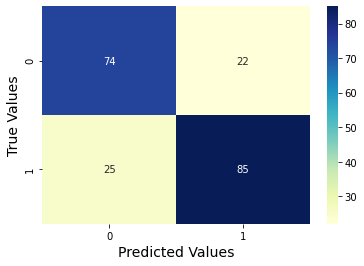

In [39]:
#predicting our values
y_balanced_lr_pred = lr.predict(x_balanced_test)

#creating our confusion matrix to visualize our data
cnf_matrix = confusion_matrix(y_balanced_test, y_balanced_lr_pred)

#the blue cells in the diagonal are the data that our model predicted correctly, the yellow cells are the wrong predictions
sns.heatmap(cnf_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')
plt.ylabel('True Values', fontsize = 14)
plt.xlabel('Predicted Values', fontsize = 14)


recall_lr = recall_score(y_balanced_test.values.ravel(), y_balanced_lr_pred, average='binary')
precision_lr = precision_score(y_balanced_test.values.ravel(), y_balanced_lr_pred)


# #measuring the accuracy of our model
# print("Recall metric in the testing dataset: ", cnf_matrix[1,1] / (cnf_matrix[1,0] + cnf_matrix[1,1]))
# print("Total set:", cnf_matrix[0,0] + cnf_matrix[0,1] + cnf_matrix[1,0] + cnf_matrix[1,1])
# print("precision metric in the testing dataset: ", 
#       (cnf_matrix[1,1] + cnf_matrix[0,0]) / (cnf_matrix[1,0] + cnf_matrix[1,1] + cnf_matrix[0,0] + cnf_matrix[0,1]))

print("Recall metric in the testing dataset: ", recall_lr)
print("Total set:", len(y_balanced_test))
print("precision metric in the testing dataset: ", precision_lr)

### KNN model

In [40]:
knn = KNeighborsClassifier()
knn.fit(x_balanced_train, y_balanced_train.values.ravel())

KNeighborsClassifier()

Recall metric in the testing dataset:  0.8090909090909091
Total set: 206
precision metric in the testing dataset:  0.8476190476190476


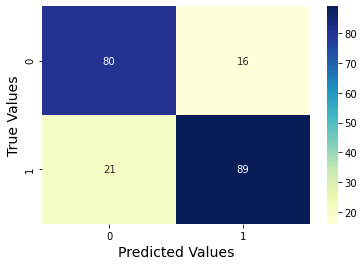

In [41]:
#predicting our values
y_balanced_knn_pred = knn.predict(x_balanced_test)

#creating our confusion matrix to visualize our data
cnf_matrix = confusion_matrix(y_balanced_test, y_balanced_knn_pred)

#the blue cells in the diagonal are the data that our model predicted correctly, the yellow cells are the wrong predictions
sns.heatmap(cnf_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')
plt.ylabel('True Values', fontsize = 14)
plt.xlabel('Predicted Values', fontsize = 14)

recall_knn = recall_score(y_balanced_test.values.ravel(), y_balanced_knn_pred, average='binary')
precision_knn = precision_score(y_balanced_test.values.ravel(), y_balanced_knn_pred)


#measuring the accuracy of our model
print("Recall metric in the testing dataset: ", recall_knn)
print("Total set:", len(y_balanced_test))
print("precision metric in the testing dataset: ", precision_knn)

### Random Forest Classifier

In [42]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_balanced_train, y_balanced_train.values.ravel())

RandomForestClassifier()

Recall metric in the testing dataset:  0.8090909090909091
Total set: 206
precision metric in the testing dataset:  0.8476190476190476


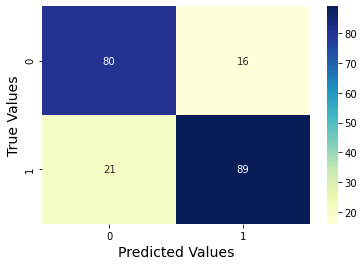

In [43]:
#predicting our values
y_balanced_rf_pred = knn.predict(x_balanced_test)

#creating our confusion matrix to visualize our data
cnf_matrix = confusion_matrix(y_balanced_test, y_balanced_rf_pred)

#the blue cells in the diagonal are the data that our model predicted correctly, the yellow cells are the wrong predictions
sns.heatmap(cnf_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')
plt.ylabel('True Values', fontsize = 14)
plt.xlabel('Predicted Values', fontsize = 14)


recall_rf = recall_score(y_balanced_test.values.ravel(), y_balanced_rf_pred, average='binary')
precision_rf = precision_score(y_balanced_test.values.ravel(), y_balanced_rf_pred)


#measuring the accuracy of our model
print("Recall metric in the testing dataset: ", recall_rf)
print("Total set:", len(y_balanced_test))
print("precision metric in the testing dataset: ", precision_rf)

### Comparing our Models

#### We can see that our KNN and Random Forest Classifiers have a higher accuracy than the Logistic Regression model, and since both have the same accuracy we can choose either of them to base our submission on (We could also use ensemble learning to combine multiple models and reach an even higher score)

In [44]:
#our final prediction
ypred = random_forest.predict(nrm_rawtest)

ypred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [45]:
#creating the submission file
submission = pd.DataFrame({
        "PassengerId": rawtest["PassengerId"],
        "Survived": ypred
    })

submission.to_csv("titanicresults.csv", 
          index=False)